<a href="https://colab.research.google.com/github/Preeti27092000/nestle_linear_reg_capstone/blob/main/nestle_inear_reg_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NESTLE INDIA STOCK PRICE PREDICTION ALGORITHM 

**Nestlé India Limited is the Indian subsidiary of Nestlé which is a Swiss multinational company.The company's products include food, beverages, chocolate, and confectioneries.**

## Problem Statement

**Here we are working to predict Nestle stock price on the basis of data we collected from the day 1 when it entered into Stock 
market. On the basis of different external factors and past behaviour of data we need to predict how it will perform in specific condition.**

## Approach

**As this problem predicts stock price it is numerical category problem where result can be any number, hence it is Continuous
distribution problem where we can apply Linear Regression Algorithm.Here we will also try to consider the effect of Time Series analysis and economic factors.**

## Steps are as follows : 

## 1. Import necessary libraries 

In [13]:
# pandas = used to load and read data
import pandas as pd
# numpy = used to do calculation between dataframe columns
import numpy as np
# matplotlib.pyplot = used to visualise data using various graph methods available in it
import matplotlib.pyplot as plt

## 2. Load and read data

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
file = "/content/drive/MyDrive/Copy of NESTLEIND_daily_full.csv"

In [16]:
#@title Default title text
# read the csv file 
df_nestle = pd.read_csv(file)
# check 1st five rows of each column of dataframe
df_nestle.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,508.100006,512.549988,505.000000,505.149994,415.997742,7100.0
1,2002-08-13,503.500000,515.000000,503.500000,509.049988,419.209534,8800.0
2,2002-08-14,502.100006,515.000000,502.100006,514.400024,423.615234,18700.0
3,2002-08-15,514.400024,514.400024,514.400024,514.400024,423.615234,0.0
4,2002-08-16,516.000000,516.849976,510.000000,511.000000,420.815247,9400.0


## 3. Data Profiling

In [17]:
# to check the shape of the dataframe
# returns as (rows,columns)
df_nestle.shape

(4826, 7)

**--> There are 4826 observations (rows) and 7 features (columns) in dataframe.**

In [18]:
# to get the name of each column
df_nestle.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [19]:
# to get the information about the data
# it will return column name and its datatypes as well number of rows where each cell contains some value(non-null number)
df_nestle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4826 entries, 0 to 4825
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4826 non-null   object 
 1   Open       4819 non-null   float64
 2   High       4819 non-null   float64
 3   Low        4819 non-null   float64
 4   Close      4819 non-null   float64
 5   Adj Close  4819 non-null   float64
 6   Volume     4819 non-null   float64
dtypes: float64(6), object(1)
memory usage: 264.0+ KB


**--> Here we can see there can be null values except 'Date' column**

In [20]:
# to check the basic statistics of each column
# count = Number of rows where element is present
# mean  = average
# std = Standard deviation used to know in what range and how far data is distributed
# min = minimum value
# 25% = 1st quartile which means 25% of the data is below the q1 value
# 50% = 2nd quartile which means 50% of the data is below the q2 value (median)
# 75% = 3rd quartile which means 75% of the data is below the q3 value
# max = maximum value of the data 
df_nestle.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4819.000000,4819.000000,4819.000000,4819.000000,4819.000000,4.819000e+03
mean,5204.690766,5260.786466,5145.069648,5201.452563,4838.138436,3.469234e+04
std,5292.899033,5349.956141,5229.311467,5289.042545,5162.053461,6.186095e+04
min,502.100006,512.549988,498.049988,505.149994,415.997742,0.000000e+00
25%,527.049988,527.049988,527.049988,527.049988,441.999664,0.000000e+00
50%,4436.000000,4479.000000,4396.000000,4434.000000,3875.172607,1.450600e+04
75%,6801.350098,6860.125000,6725.125000,6795.324951,6184.599853,4.544950e+04
max,20450.000000,20609.150391,20230.000000,20457.199219,20164.644531,1.106746e+06


**--> Here we can see there are most columns present where mean and median are almost at same range. But if we find large difference between mean and median, then there are chanced to have outliers.**

**--> Outliers are nothing but extremely high or low values which are out of range of column and it affects mean value** 

**[*] Value counts of categorical column**


**--> No need to do this as only column 'Date' is categorical**

**[*] Drop unnecessary column say Adj Close**

In [21]:
df_nestle.drop('Adj Close',axis = 1,inplace = True)

**[*] Check null values**

In [22]:
# isnull() = checks is there any null value row-wise, returns True if there are null values
# sum() = gives sum of rows where there is null value
df_nestle.isnull().sum()

Date      0
Open      7
High      7
Low       7
Close     7
Volume    7
dtype: int64

**--> All columns have null values except 'Date' column.**

**As this data and project is connected to finance, it is not appropriate to drop null value rows as it can be very important
event to look upon**

In [23]:
null_rows = df_nestle.loc[df_nestle.isna().any(axis = 1)]
null_rows

,Date,Open,High,Low,Close,Volume
1883,2010-02-06,NaN,NaN,NaN,NaN,NaN
2361,2012-01-07,NaN,NaN,NaN,NaN,NaN
2400,2012-03-03,NaN,NaN,NaN,NaN,NaN
2530,2012-09-08,NaN,NaN,NaN,NaN,NaN
2572,2012-11-11,NaN,NaN,NaN,NaN,NaN
2909,2014-03-22,NaN,NaN,NaN,NaN,NaN
3138,2015-02-28,NaN,NaN,NaN,NaN,NaN


In [24]:
a1 = df_nestle.iloc[1882]
a2 = df_nestle.iloc[1883]
a3 = df_nestle.iloc[1884]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[1883] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[1883]

Date       2010-02-06
Open           2576.0
High           2627.0
Low            2506.0
Close     2597.300049
Volume         4916.0
Name: 1883, dtype: object

In [25]:
a1 = df_nestle.iloc[2360]
a2 = df_nestle.iloc[2361]
a3 = df_nestle.iloc[2362]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2361] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2361]

Date      2010-02-06
Open         4123.25
High          4148.5
Low           4082.5
Close       4117.375
Volume       16805.5
Name: 2361, dtype: object

In [26]:
a1 = df_nestle.iloc[2399]
a2 = df_nestle.iloc[2400]
a3 = df_nestle.iloc[2401]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2400] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2400]

Date       2010-02-06
Open      4449.175049
High      4489.475098
Low       4379.199951
Close     4439.324951
Volume        26614.0
Name: 2400, dtype: object

In [27]:
a1 = df_nestle.iloc[2529]
a2 = df_nestle.iloc[2530]
a3 = df_nestle.iloc[2531]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2530] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2530]

Date       2010-02-06
Open      4648.899902
High      4658.399902
Low            4577.5
Close         4596.25
Volume        66783.5
Name: 2530, dtype: object

In [28]:
a1 = df_nestle.iloc[2571]
a2 = df_nestle.iloc[2572]
a3 = df_nestle.iloc[2573]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2572] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2572]

Date       2010-02-06
Open      4884.975098
High           4910.0
Low       4824.975098
Close     4833.099853
Volume         6509.5
Name: 2572, dtype: object

In [29]:
a1 = df_nestle.iloc[2908]
a2 = df_nestle.iloc[2909]
a3 = df_nestle.iloc[2910]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[2909] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[2909]

Date       2010-02-06
Open           4800.0
High      4829.899902
Low            4713.0
Close     4726.349853
Volume        28163.5
Name: 2909, dtype: object

In [30]:
a1 = df_nestle.iloc[3137]
a2 = df_nestle.iloc[3138]
a3 = df_nestle.iloc[3139]
b1 = (a1['Open'] + a3['Open'])/2
b2 = (a1['High'] + a3['High'])/2
b3 = (a1['Low'] + a3['Low'])/2
b4 = (a1['Close'] + a3['Close'])/2
b5= (a1['Volume'] + a3['Volume'])/2

df_nestle.iloc[3138] = {'Date':'2010-02-06','Open':b1,'High':b2,'Low':b3,'Close':b4,'Volume':b5}
df_nestle.iloc[3138]

Date       2010-02-06
Open      7047.274902
High      7054.399902
Low       6974.725098
Close     7005.474853
Volume        45861.0
Name: 3138, dtype: object

In [31]:
df_nestle.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Here we can see all null values are being replaced by the mean of previous row and successive row**

## Detecting Outliers

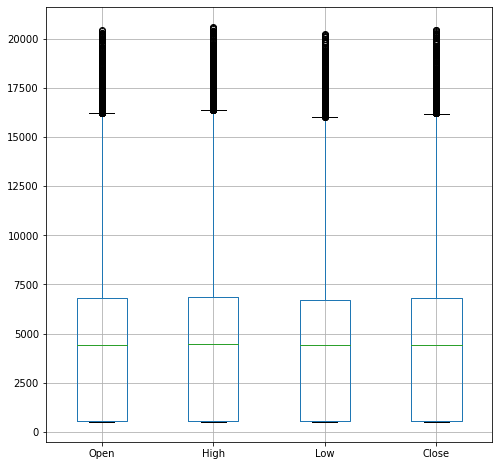

In [32]:
# by using rcParams and its method 'figure.figsize' we can adjust the length and breadh of the figure
plt.rcParams['figure.figsize'] = [8,8]

# using boxplot to check whether data columns has any outlier value
# boxplot indicates maximum value,3rd quartile,median,1st quartile and minimum value with linea and whiskers
# whereas circle shows outliers

df_nestle_temp = df_nestle.copy()
df_nestle_temp.drop('Volume',axis = 1,inplace = True)
df_nestle_temp.boxplot()

In [47]:
#@title Treatment to outliers

In [48]:
q1 = np.percentile(df_nestle_temp['Open'],25)   # q1 = first quartile using 25%
q3 = np.percentile(df_nestle_temp['Open'],75)   # q3 = third quartile using 75%
iqr = q3 - q1                                   # iqr = inter quartile range , difference between 1st and third quartile
low = q1 - 1.5*iqr                              # low = set threshhold that values 1.5 times of iqr lower than q1 
high = q3 + 1.5*iqr                             # high = set threshhold that values 1.5 times of iqr more than q3 


# criterion : if any value in copy df is lower than q1 or higher than q3 are there in loop, drop that index
for i in df_nestle_temp['Open']:
    if i > high and i < low:
        df_nestle_temp.drop(df_nestle_temp.index[i],inplace = True)

# find mean from the copied df where values not matching criterion are removed        
m1 = float(df_nestle_temp['Open'].mean())        
print("Mean of copied dataframe 'Open' :",m1)

# for any value in original df not matching criterion , then replace it with mean of copied df
for i in df_nestle['Open']:
    if i > high:
        df_nestle['Open'].replace(to_replace = i,value = m1,inplace = True)
for i in df_nestle['Open']:
    if i < low:
        df_nestle['Open'].replace(to_replace = i,value = m1,inplace = True)


Mean of copied dataframe 'Open' : 5203.8819675624745


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


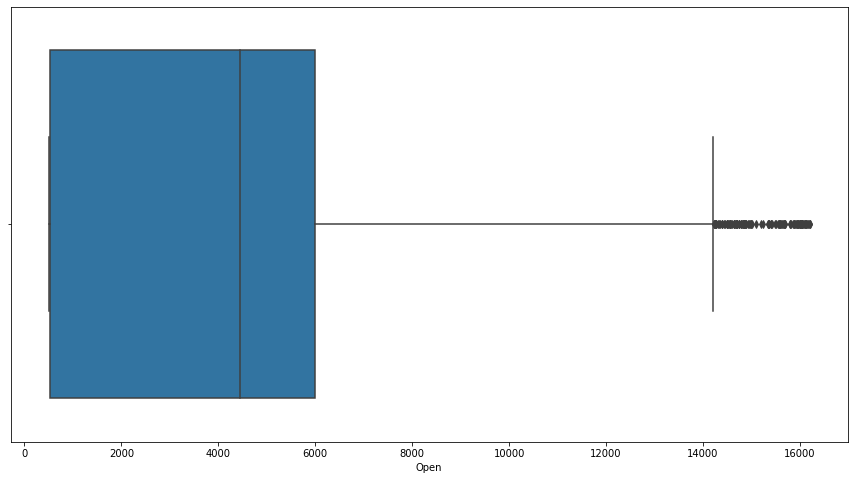

In [49]:
import seaborn as sns             # seaborn is library of python used to visualise graphs and pictorial way efficiently
sns.boxplot(df_nestle['Open'])

In [35]:
q1 = np.percentile(df_nestle_temp['Close'],25)
q3 = np.percentile(df_nestle_temp['Close'],75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

for i in df_nestle_temp['Close']:
    if i > high and i < low:
        df_nestle_temp.drop(df_nestle_temp.index[i],inplace = True)
        
m1 = float(df_nestle_temp['Close'].mean())
m1

for i in df_nestle['Close']:
    if i > high:
        df_nestle['Close'].replace(to_replace = i,value = m1,inplace = True)
for i in df_nestle['Close']:
    if i < low:
        df_nestle['Close'].replace(to_replace = i,value = m1,inplace = True)

In [36]:
q1 = np.percentile(df_nestle_temp['High'],25)
q3 = np.percentile(df_nestle_temp['High'],75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

for i in df_nestle_temp['High']:
    if i > high and i < low:
        df_nestle_temp.drop(df_nestle_temp.index[i],inplace = True)
        
m1 = float(df_nestle_temp['High'].mean())
m1

for i in df_nestle['High']:
    if i > high:
        df_nestle['High'].replace(to_replace = i,value = m1,inplace = True)

for i in df_nestle['High']:
    if i < low:
        df_nestle['High'].replace(to_replace = i,value = m1,inplace = True)        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


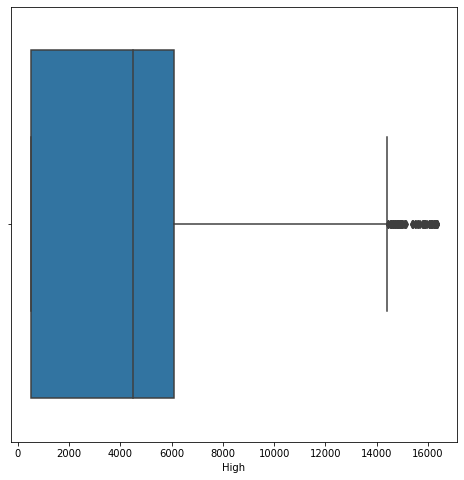

In [37]:
sns.boxplot(df_nestle['High'])

In [38]:
q1 = np.percentile(df_nestle_temp['Low'],25)
q3 = np.percentile(df_nestle_temp['Low'],75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

for i in df_nestle_temp['Low']:
    if i > high and i < low:
        df_nestle_temp.drop(df_nestle_temp.index[i],inplace = True)
        
m1 = float(df_nestle_temp['Low'].mean())
m1
for i in df_nestle['Low']:
    if i > high:
        df_nestle['Low'].replace(to_replace = i,value = m1,inplace = True)
for i in df_nestle['Low']:
    if i < low:
        df_nestle['Low'].replace(to_replace = i,value = m1,inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


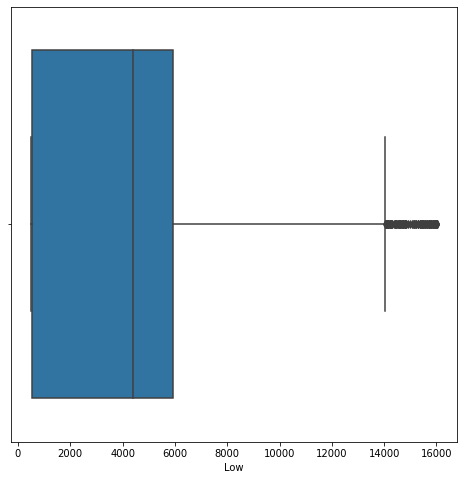

In [39]:
sns.boxplot(df_nestle['Low'])

In [50]:
# convert all columns into numeric datatype
df_nestle[['Open', 'High', 'Low', 'Close']] = df_nestle[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric)

In [41]:
df_nestle1 = df_nestle.drop('Volume',axis = 1)

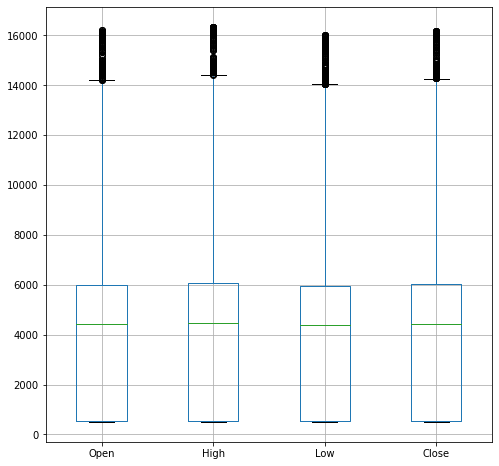

In [42]:
df_nestle1.boxplot()

In [43]:
# to make line graphs ,'Date' column is needed to be at index so we use set_index method to change index to 'Date'
df_nestle = df_nestle.set_index('Date')

In [53]:
#@title Data Visualisation

Text(0.5, 1.0, 'Trend of "Close" column during years')

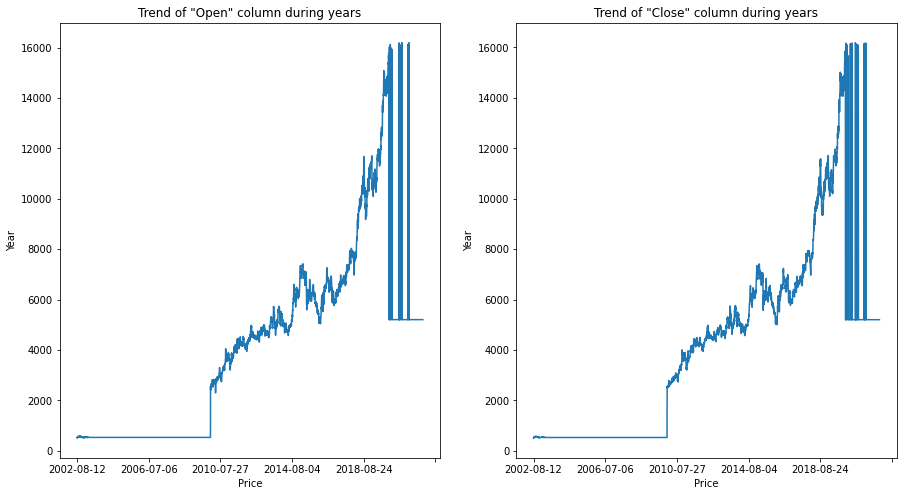

In [57]:
plt.rcParams['figure.figsize'] = [15,8]
# subplot = module or method of python, needed to visualise more than one graphs together by placing it side by side
# subplot(total rows,columns needed in each row,index at which column which graph is to be placed)
plt.subplot(1,2,1)
b = df_nestle['Open'].plot() 
plt.xlabel('Price')          
plt.ylabel('Year')
plt.title('Trend of "Open" column during years') 
# using plot method gor line graph by default
plt.subplot(1,2,2)
a = df_nestle['Close'].plot()
plt.xlabel('Price')          
plt.ylabel('Year')
plt.title('Trend of "Close" column during years') 